<a href="https://colab.research.google.com/github/Marcll0/R/blob/main/M%C3%A9todo_de_Reamostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computação Bayesiana

Métodos de Reamostragem - Reamostragem Ponderada

Estes métodos usam a mesma idéia de gerar valores de uma distribuição auxiliar
porém sem a necessidade de maximização da verossimilhança. A desvantagem
é que os valores obtidos são apenas aproximadamente distribuidos segundo a
posteriori.

O método consiste em tomar uma segunda amostra (ou reamostra) de tamanho
m da distribuição discreta em θ1, . . . , θn com probabilidades w1, . . . , wn.
Também não é necessário que se conheça completamente a posteriori mas apenas
o produto priori vezes verossimilhança já que neste caso os pesos não se alteram.

O algoritmo para geração de valores (aproximadamente) da posteriori então
fica:
1. gerar valores θ1, . . . , θn da distribuição a priori;
2. calcular os pesos wi,       i = 1, . . . , n;
3. reamostrar valores com probabilidades w1, . . . , wn.

**Exemplo:**

Em um modelo de regressão linear simples temos que yi ∼ N(βxi
, 1).

Os
dados observados são y = (−2, 0, 0, 0, 2) e x = (−2, −1, 0, 1, 2), e usamos
uma priori vaga N(0, 4) para β. Fazendo a inferência sobre β para obter uma
amostra da posteriori usando reamostragem ponderada, temos:

In [3]:
# Obtem uma amostra da distribuicao a posteriori dos parametros em um
# modelo de regressao linear simples via metodo de reamostragem
# ponderada
x <- c(-2,-1,0,1,2)
y <- c(-2, 0,0,0,2)
n <- 1000 # tamanho da amostra da priori
m <- 500  # tamanho da reamostra
par(mfrow = c(2, 2))
beta <- matrix(rnorm(n, 0, 2), nrow = n)
l <- matrix(NA, nrow = n)

In [6]:
for(i in 1:n){
l[i] <- exp(- (1/2) * t(y - beta[i] * x) %*% (y - beta[i] * x))
}
p <- matrix(NA, nrow = n)
for(i in 1:n)
{
p[i] <- l[i]/sum(l)
}
resample <- sample(beta, size = m, replace = T, prob = p)

Podemos Comparar com a estimativa de máxima verossimilhança β_chapeu = 0, 8.

Warning message in plot.window(xlim, ylim, "", ...):
“"title" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"title" is not a graphical parameter”
Warning message in axis(1, ...):
“"title" is not a graphical parameter”
Warning message in axis(2, at = yt, ...):
“"title" is not a graphical parameter”
Warning message in plot.window(...):
“"title" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"title" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"title" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"title" is not a graphical parameter”
Warning message in box(...):
“"title" is not a graphical parameter”
Warning message in title(...):
“"title" is not a graphical parameter”


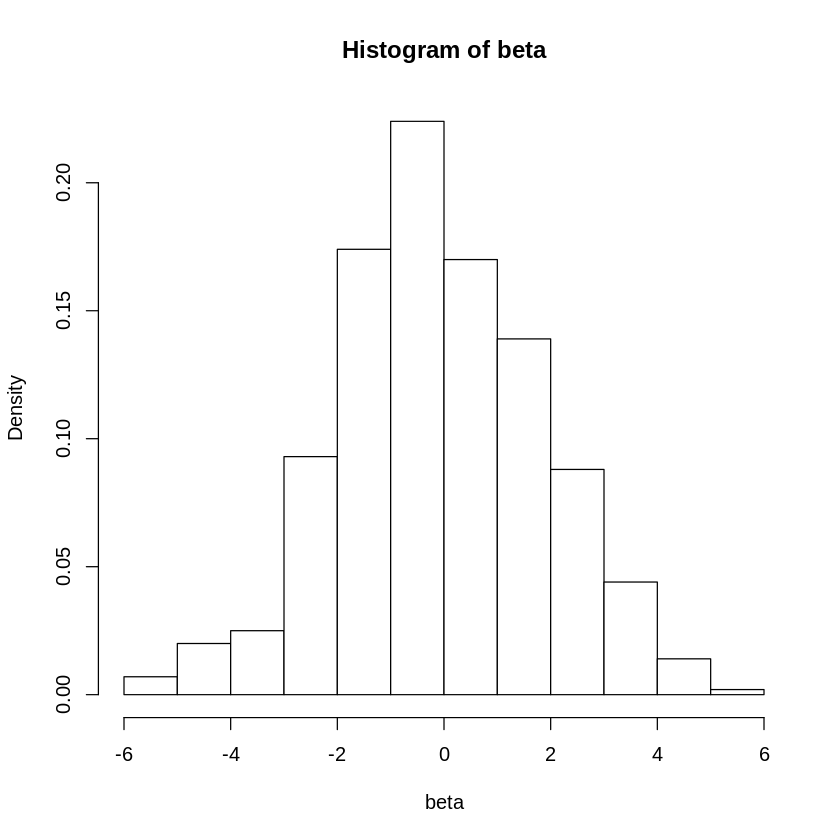

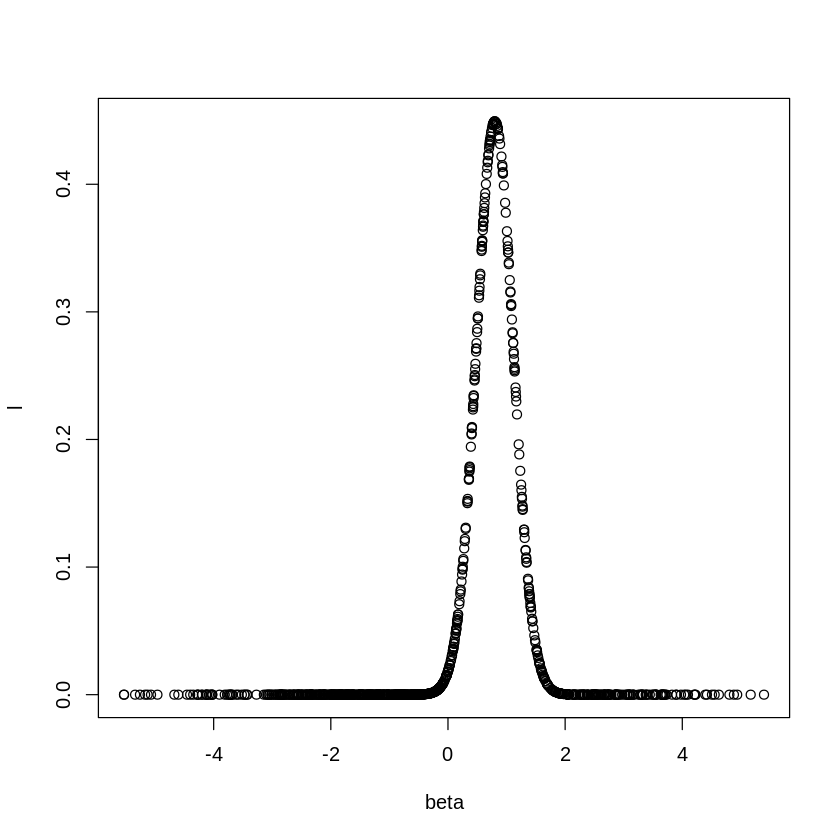

$beta
       V1          
 Min.   :-5.53066  
 1st Qu.:-1.35002  
 Median :-0.18343  
 Mean   :-0.07602  
 3rd Qu.: 1.26184  
 Max.   : 5.39483  

$resample
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1831  0.5499  0.7464  0.7712  1.0251  1.7134 


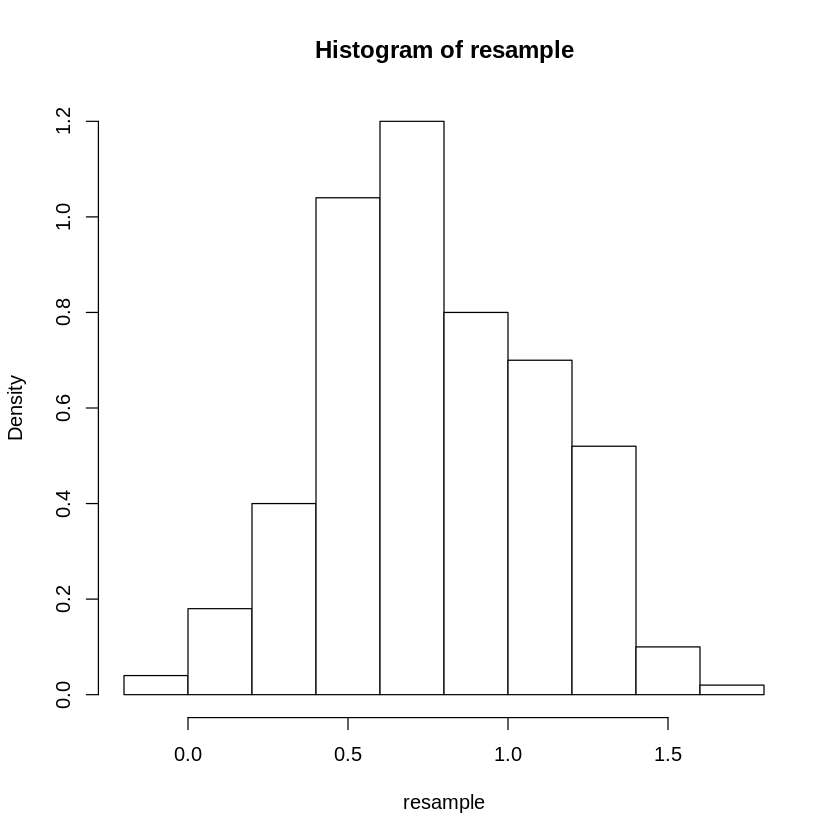

In [7]:
hist(beta, col = 0, prob = T, title="priori")
plot(beta, l, title="")
hist(resample, col = 0, prob = T)
list(beta = summary(beta), resample = summary(resample))